# CSS Bootcamp

## Day 5 (Mixed models): Lab

This lab is intended to accompany **Day 5** of the week on **Statistics**, which focuses on:

- Implementing and interpreting **logistic regression** models in Python.  
- Common **pitfalls** with regression models.  
- Conceptual foundations of **mixed/multilevel models**.  
- **Implementing** mixed/multilevel models in Python.

This lab has some "free response" questions, in which you are asked to describe or make some inference from a graph. 

It also has questions requiring you to program answers in Python. In some cases, this will use built-in functions we've discussed in class (either today, or previous weeks). In others, there'll be a built-in function that we *haven't* discussed, which you will have to look up in the documentation. And in other cases, you'll be asked to write an original function.

Please reach out for help if anything is unclear!

#### Key imports

Here, we import some of the libraries that will be critical for the lab.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Part 1: Logistic regression review

## Dataset: chocolate or not?

The [dataset we'll be using was taken from Kaggle](https://www.kaggle.com/code/venkatchidambaram/chocolate-or-not/data), and contains information about a number of different candies, including:

- `chocolate`: whether it's a chocolate candy or not.  
- `caramel`: whether it has caramel or not.  
- `hard`:  whether it's a hard candy
- `bar`:  whether it's a candy bar

And many more. See the [538 description](https://fivethirtyeight-r.netlify.app/reference/candy_rankings.html) for more details.

In this section, we'll be focusing on predicting whether a given candy is **chocolate** or **not**.

#### Load data

In [2]:
df_chocolate = pd.read_csv("data/lab/chocolate.csv")
df_chocolate.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


##### Use `seaborn` to make a `barplot` showing the proportion of chocolate candies as a function of `caramel`.

In [3]:
#### Your code here

<AxesSubplot:xlabel='caramel', ylabel='chocolate'>

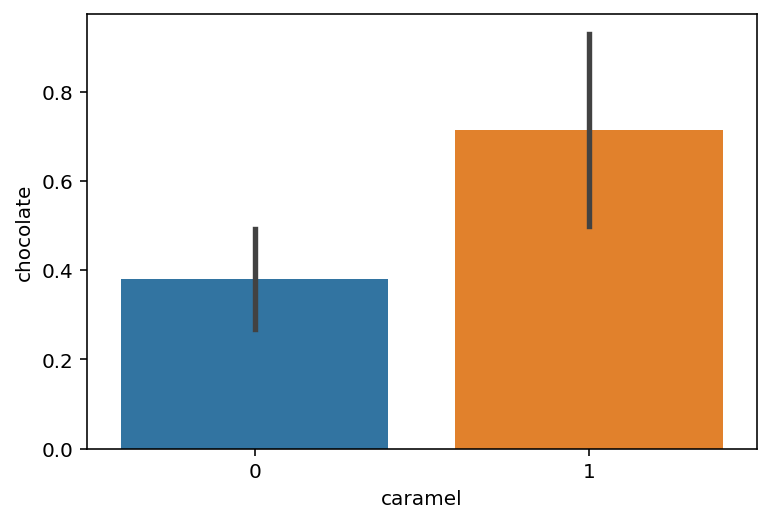

In [4]:
sns.barplot(data = df_chocolate,
           x = 'caramel',
           y = 'chocolate')

##### Use `seaborn` to make a `barplot` showing the proportion of chocolate candy bars as a function of `bar`.

In [5]:
#### Your code here

<AxesSubplot:xlabel='bar', ylabel='chocolate'>

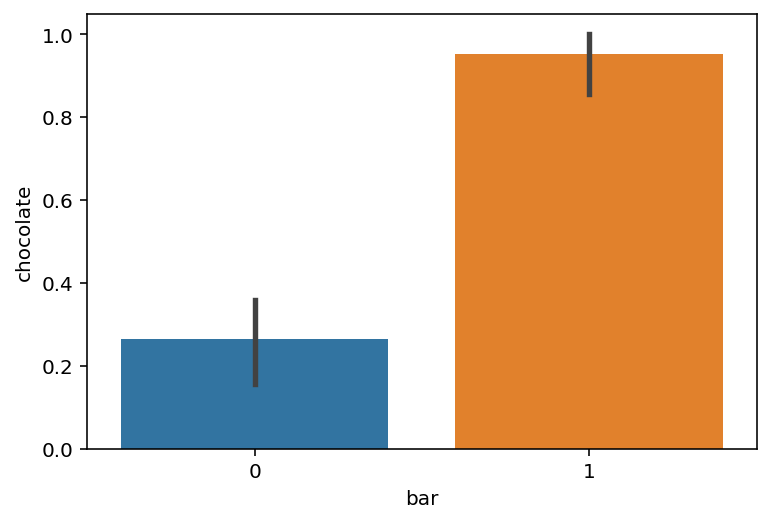

In [6]:
sns.barplot(data = df_chocolate,
           x = 'bar',
           y = 'chocolate')

##### Use `seaborn` to make a `barplot` showing the proportion of chocolate candy bars as a function of `hard`.

In [7]:
#### Your code here

<AxesSubplot:xlabel='hard', ylabel='chocolate'>

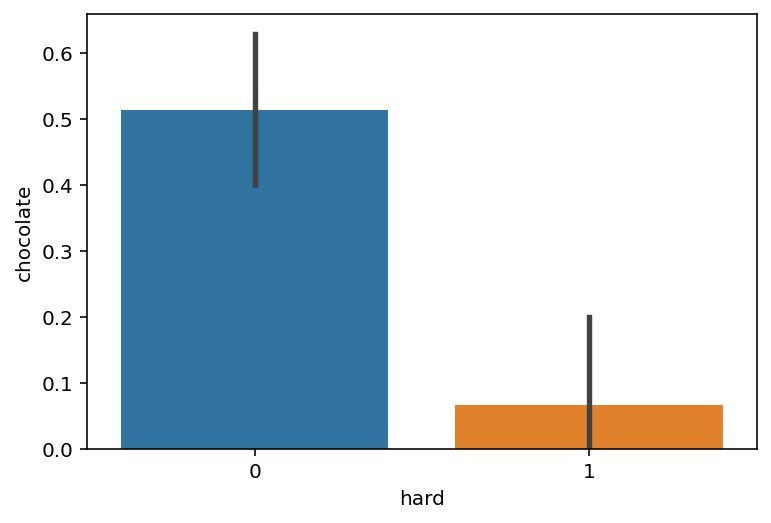

In [8]:
sns.barplot(data = df_chocolate,
           x = 'hard',
           y = 'chocolate')

##### Now build a logistic regression model using `statsmodels`, predicting `chocolate` from `hard`.

In [9]:
#### Your code here

In [10]:
mod = smf.logit(formula = 'chocolate ~ hard', data = df_chocolate).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.613714
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              chocolate   No. Observations:                   85
Model:                          Logit   Df Residuals:                       83
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Aug 2022   Pseudo R-squ.:                  0.1037
Time:                        20:35:37   Log-Likelihood:                -52.166
converged:                       True   LL-Null:                       -58.204
Covariance Type:            nonrobust   LLR p-value:                 0.0005107
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0572      0.239      0.239      0.811      -0.412       0.526
hard          -2.6962      1.062     -2.538      0.011      -4.778      -0.614
==============================================================================
"""

##### Write out this model as a linear equation.

In [11]:
#### Your code here

$log(\frac{p(y)}{1 - p(y)}) = 0.06 - 2.7X_{hard}$

##### What is the predicted log-odds of being a chocolate candy for candies that *aren't* hard?

In [12]:
#### Your code here

In [13]:
log_odds = 0.06
log_odds

0.06

##### What is the predicted probability of being a chocolate candy for candies that *aren't* hard?

In [14]:
#### Your code here

In [15]:
np.exp(log_odds) / (1 + np.exp(log_odds))

0.5149955016194101

##### What is the predicted probability of being a chocolate candy for candies that are hard?

In [16]:
#### Your code here

In [17]:
log_odds = 0.06 - 2.7
np.exp(log_odds) / (1 + np.exp(log_odds))

0.06660803557509065

##### Now build a series of logistic regression models (described below). For each model, extract the AIC. Then compare and plot these AIC values in a barplot.

Models:

- `hard` only
- `bar` only
- `caramel` only
- `hard + bar + caramel`

In [18]:
#### Your code here

<AxesSubplot:xlabel='model', ylabel='aic'>

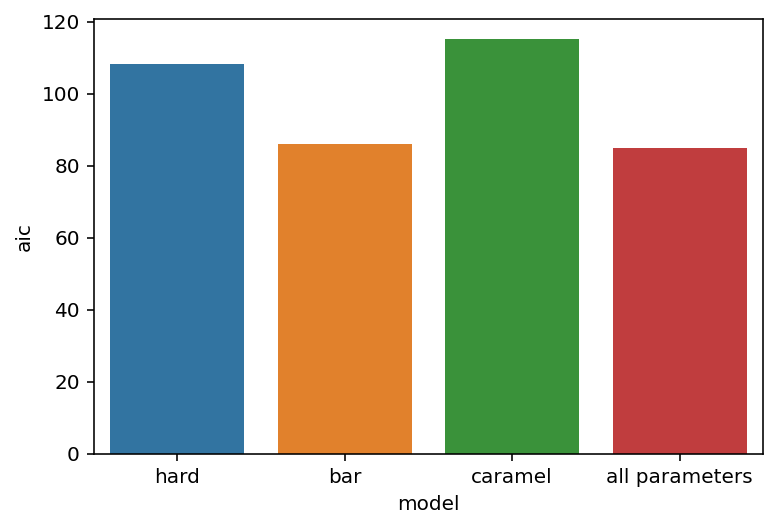

In [19]:
mod_hard = smf.logit(formula = 'chocolate ~ hard', data = df_chocolate).fit(disp=0)
mod_bar = smf.logit(formula = 'chocolate ~ bar', data = df_chocolate).fit(disp=0)
mod_caramel = smf.logit(formula = 'chocolate ~ caramel', data = df_chocolate).fit(disp=0)
mod_all = smf.logit(formula = 'chocolate ~ hard + bar + caramel', data = df_chocolate).fit(disp=0)

df_results = pd.DataFrame({'aic': [mod_hard.aic, mod_bar.aic, mod_caramel.aic, mod_all.aic],
                         'model': ['hard', 'bar', 'caramel', 'all parameters']})

sns.barplot(data = df_results,
           x = 'model',
           y = 'aic')

##### Based on these results, what would you say about the relative predictive power of each parameter (`hard`, `bar`, and `caramel`)? Do some add more information than others? If so, which ones?

In [20]:
#### Your response here

**Answer**: It seems that `bar` is the most informative parameter. The AIC is almost as low as the model with *all* parameters, despite only having `bar`. This is not true of `hard` and `caramel`.

##### (Optional / take-home): Explore some of the other variables in the dataframe. Which ones are the most predictive?

In [21]:
#### Your response here

# Part 2: Mixed effects models

## Dataset: Experimental data

We'll be considering a dataset with data that I collected for my PhD dissertation. This is an extension of the RAW-C project mentioned earlier. 

Here, instead of rating the **relatedness** of different word usages, subjects responded in a sentence plausibility task. We measured their reaction time (RT) and accuracy. In this analysis, we'll ask whether differences in `log(RT)` correspond to the key **manipulation** of `same` vs. `different` sense––while controlling for subject-wide differences.

#### Load data

In [56]:
df_polysemy = pd.read_csv("data/lab/rt.csv")
df_polysemy.head(5)

,distance_bert,same,log_rt,subject
0,0.226773,False,7.272398,u6tgegpyj0
1,0.273911,False,7.355002,1vz3fdcvtw
2,0.226773,False,7.388328,mwacu22792
3,0.122557,True,7.027315,v75fv9pagb
4,0.122557,True,7.186144,9fkbaxk3zu


##### First, plot `log_rt` as a function of `same`. 

In [57]:
#### Your code here

<AxesSubplot:xlabel='same', ylabel='log_rt'>

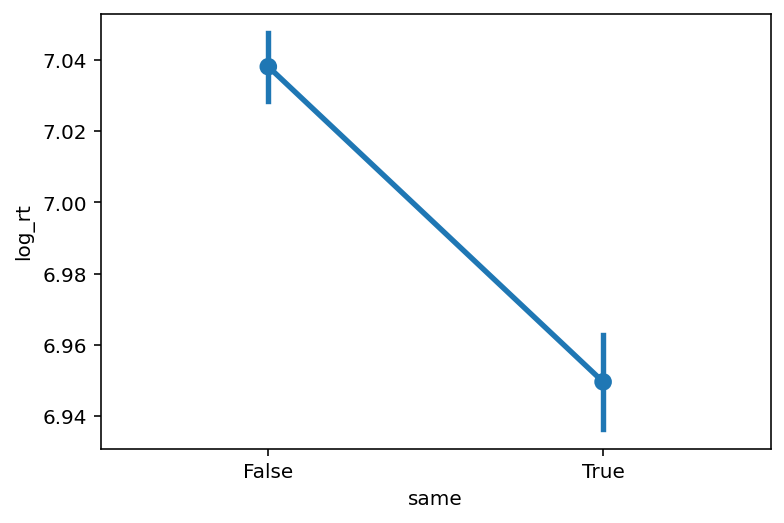

In [58]:
sns.pointplot(data = df_polysemy, x = 'same', y = 'log_rt', alpha = .2)

##### Now, build a ordinary regression model predicting `log_rt` from `same`.

In [59]:
#### Your code here

In [60]:
mod_ols = smf.ols(data = df_polysemy, formula = 'log_rt ~ same').fit()
mod_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_rt   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     111.1
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           7.60e-26
Time:                        20:51:53   Log-Likelihood:                -4987.5
No. Observations:               10146   AIC:                             9979.
Df Residuals:                   10144   BIC:                             9993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.0381      0.005   1473.084      0.000       7.029       7.047
same[T.True]    -0.0885      0.008    -10.541      0.000      -0.105      -0.072
==============================================================================
Omnibus:                     2079.141   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6885.798
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       6.471   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inspect the parameters. How would you interpret the coefficient for `same`?

In [61]:
#### Your code here

In [63]:
mod.params

Intercept    0.057158
hard        -2.696216
dtype: float64

##### Are there any sources of non-independence in this dataset? If so, what are they?

In [46]:
#### Your code here

In [65]:
df_polysemy['subject'].value_counts()

6g6ama8qck    56
gl71hqusr0    56
4suqxr8zom    56
lpduruhrnk    56
lt0kapj5fz    56
              ..
gtj74gj1hs    47
o40xglp55j    47
2r8jyhe7un    46
epkefl89q5    45
phcg9go4je    35
Name: subject, Length: 187, dtype: int64

**Answer**: Yes, `subject` has multiple observations per group.

##### Build a `mixedlm` model accounting for `subject`-level non-independence (i.e., random intercepts for subjects).

In [68]:
#### Your code here

In [71]:
md_full = smf.mixedlm("log_rt ~ same", df_polysemy, groups=df_polysemy["subject"]).fit()
md_full.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: log_rt    
No. Observations: 10146   Method:             REML      
No. Groups:       187     Scale:              0.1137    
Min. group size:  35      Log-Likelihood:     -3661.7286
Max. group size:  56      Converged:          Yes       
Mean group size:  54.3                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     7.035    0.016 447.414 0.000  7.004  7.066
same[T.True] -0.085    0.007 -11.804 0.000 -0.099 -0.071
Group Var     0.043    0.014                            
========================================================

"""

##### Now a `mixedlm` model with only `subject`-level random intercepts, omitting the fixed effect of `same`.

In [68]:
#### Your code here

In [70]:
md_reduced = smf.mixedlm("log_rt ~ 1", df_polysemy, groups=df_polysemy["subject"]).fit()
md_reduced.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: log_rt    
No. Observations: 10146   Method:             REML      
No. Groups:       187     Scale:              0.1153    
Min. group size:  35      Log-Likelihood:     -3726.9088
Max. group size:  56      Converged:          Yes       
Mean group size:  54.3                                  
--------------------------------------------------------
              Coef. Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     7.008    0.016 449.868 0.000  6.977  7.038
Group Var     0.043    0.014                            
========================================================

"""

##### How many more parameters does the full model have than the reduced model?

In [73]:
#### Your code here

**Answer**: 1 more parameter.

##### Using the method discussed in class, conduct a LRT comparing the full to reduced model.

In [74]:
#### Your code here

In [75]:
lrt = -2 * (md_reduced.llf - md_full.llf)
lrt 

130.3603418480925

In [76]:
diff_parameters = 1
ss.chi2.sf(lrt, df=diff_parameters)

3.417502636142147e-30

##### Based on this result, does the fixed effect of `same` improve the model?

In [73]:
#### Your code here

**Answer**: Yes, quite a bit.

# Conclusion

Congratulations, you've now gotten some more practice building **logistic regression** models, *and* building mixed models in Python!